Bernardo Camarena

Rodolfo Pichardini 

Examen Parcial 2 Probabilidad y estadística

Tenemos a continuación una base de datos sobre los salarios de Data Science. Nos muestra el puesto de trabajo, su salario en dolares y en el tipo de moneda que se use para cada uno. Tambien no incluye el año del trabajo, el nivel de experiencia, la residencia del empleado, la ubicación y el tamaño de la compañia.

**work_year**: The year the salary was paid.

**experience_level**: The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

**employment_type**: The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance

**job_title**: The role worked in during the year.

**salary**: The total gross salary amount paid.

**salary_currency**: The currency of the salary paid as an ISO 4217 currency code.

**salary_in_usd**: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

**employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code.

**remote_ratio**: The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

**company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.

**company_size**: The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

Estos datos se consiguieron de: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

Empezamos importando pandas y creando el data frame "data" con el csv "ds_salaries.csv"

In [ ]:
import pandas as pd
#paqueteria para hacer un mapa
import folium
from folium.plugins import HeatMap
#para los boxplots
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size":15, "figure.figsize": (20,10)} )

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ds_salaries.csv")
data
#creamos el dataframe de todos los datos

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


vamos a limpiar los datos eliminando la columna de Unnamed: 0 ya que no nos sirve de nada porque ya tenemos el index, que basicamente es el ID.

In [ ]:
data = data.drop("Unnamed: 0", axis = 1)

1. ¿Cuál es el salario anual promedio de un Data Engineer?

Hacemos un groupby de la columna job title, sacamos el mean() (promedio) de la columna salary in usd y hacemos un loc de la fila que es del puesto "Data Engineer"

In [ ]:
data.groupby(by="job_title").mean().salary_in_usd.loc["Data Engineer"]


112725.0

El promedio de un Data Engineer en dolares anualmente es de $ 112,725 USD. 

2. Data Frame con los 5 empleos mejores pagados

Bueno, para hacer esto vamos a agrupar por job title y sacaremos el promedio del salario en USD, luego acomodaremos esto de mayor a menor. Ponemos un head que solo nos da los 5 primeros y esto lo igualamos a una variable "top5best" y posteriormente esta varaible igualamos a la misma pero ahora como un data frame de pandas.

In [ ]:
top5best = data.groupby(by="job_title").mean().sort_values(["salary_in_usd"], ascending = False).head(5).salary_in_usd
top5best = pd.DataFrame(top5best)
top5best

,salary_in_usd
job_title,
Data Analytics Lead,405000.000000
Principal Data Engineer,328333.333333
Financial Data Analyst,275000.000000
Principal Data Scientist,215242.428571
Director of Data Science,195074.000000


Podemos ver que el empleo mejor pagado (por promedio) es Data Analytics Lead, luego Principal Data Engineer, Financial Data analyst, Principal Data Scientist y en 5to lugar es Director of Data Science.

3. BoxPlot Job Title vs Salary in USD. 

Un box plot donde comparamos los job titles con salary in USD se refiere basicamente que nos va a mostrar un box plot o caja con bigotes por cada nombre de puesto. En total hay 50 puestos unicos, lo cual nos va a mostrar 50 cajas bigote en la grafica, y en el eje "y" esta enumerado de 0 a 600,000, lo cual se refiere a la cantidad de salario en USD que se paga por puesto. La caja nos muestra el minimo y el maximo que hay en cada puesto, igualmente sus cuartiles como el 25% 50% y 75%, y los outliers que son los salarios que no son comunes en el rango. 

In [ ]:
#veamos los numeros de puestos que hay en el data frame
data["job_title"].nunique()

50

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


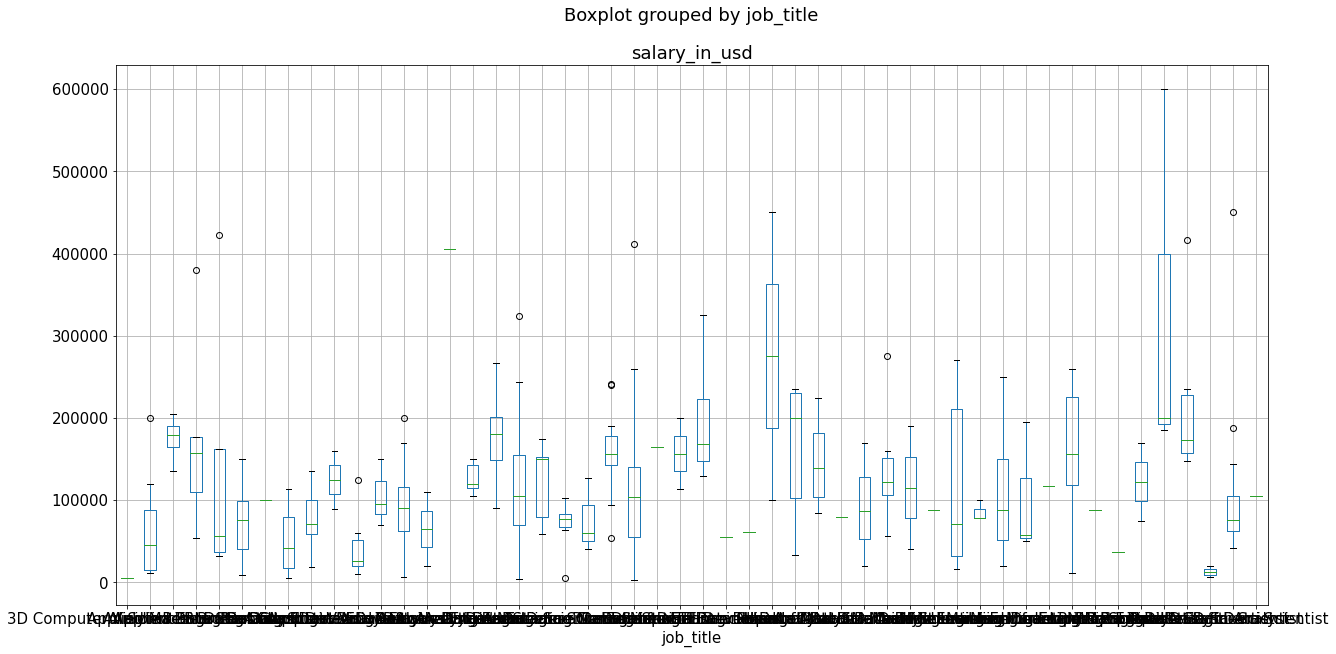

In [ ]:
data.boxplot(column = "salary_in_usd", by = "job_title")


Como podemos ver el nombre de cada boxplot se encima en los otros, lo cual para organizar la grafica en ves de usar nombvre vamos a usar numeros y tendremos a la mano una lista donde nos indique que numero corresponde a que nombre. Vamos a hacer un data frame donde tengamos solamente los valores unicos de los puestos y con su numero asignado y despues lo agregaremos al data frame grande para que cada puesto este clasificado con un numero y asi podamos graficarlo con estos mismos.

In [ ]:


IDs= pd.DataFrame()
IDs["job_title"] = data["job_title"].unique()
IDs["ID"] = IDs.index.values+1
IDs

,job_title,ID
0,Data Scientist,1
1,Machine Learning Scientist,2
2,Big Data Engineer,3
3,Product Data Analyst,4
4,Machine Learning Engineer,5
5,Data Analyst,6
6,Lead Data Scientist,7
7,Business Data Analyst,8
8,Lead Data Engineer,9
9,Lead Data Analyst,10


Muy bien ahora que ya tenemos el identificador de cada puesto que podemos tenerlo a la mano para saber cual boxplot corresponde a cual ahora vamos a hacer un merge a nuesto data frame principal para tener el id en cada puesto

In [ ]:
data =  pd.merge(data,IDs,left_on="job_title",right_on="job_title")

In [ ]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,ID
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,1
1,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,1
2,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S,1
3,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L,1
4,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,MI,FT,ETL Developer,50000,EUR,54957,GR,0,GR,M,46
603,2022,EX,FT,Head of Machine Learning,6000000,INR,79039,IN,50,IN,L,47
604,2022,MI,FT,NLP Engineer,240000,CNY,37236,US,50,US,L,48
605,2022,SE,FT,Lead Machine Learning Engineer,80000,EUR,87932,DE,0,DE,M,49


ahora que ya cada puesto tiene su id correspondente vamos a graficarlo pero en vez de que sea por nombre de puesto va a ser por ID y asi va a ser mas facil entender la grafica

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


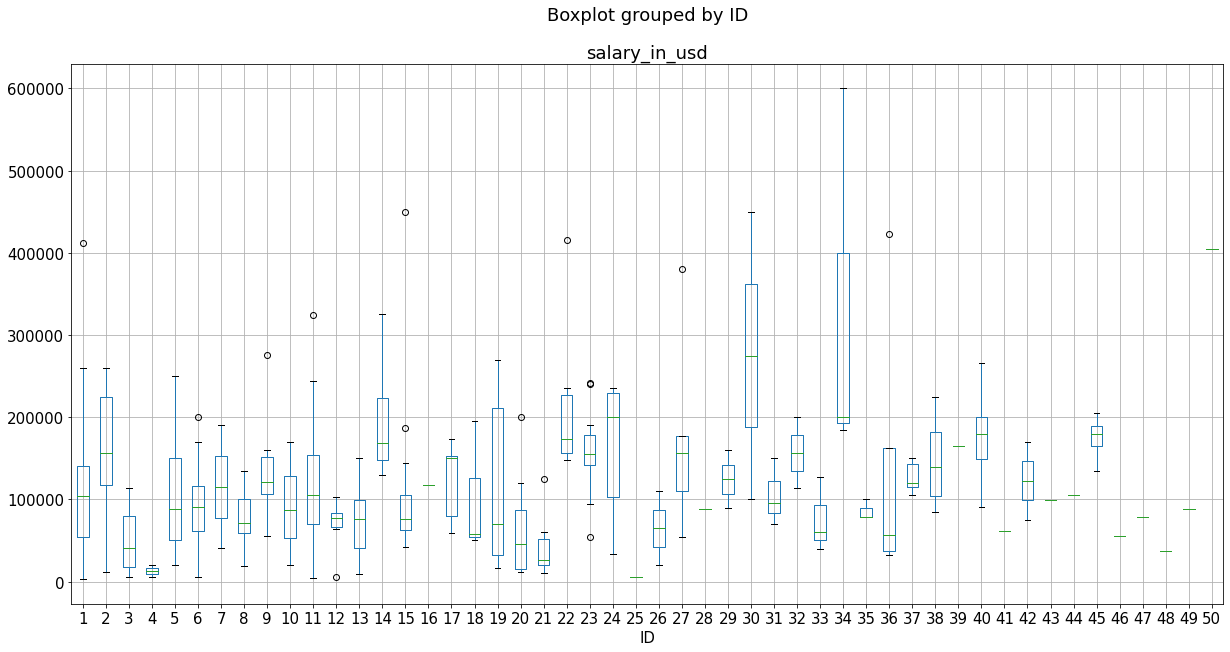

In [ ]:

data.boxplot(column = "salary_in_usd", by = "ID",  )


In [ ]:
IDs

,job_title,ID
0,Data Scientist,1
1,Machine Learning Scientist,2
2,Big Data Engineer,3
3,Product Data Analyst,4
4,Machine Learning Engineer,5
5,Data Analyst,6
6,Lead Data Scientist,7
7,Business Data Analyst,8
8,Lead Data Engineer,9
9,Lead Data Analyst,10


4. El empleo mejor pagado y el promedio de este

Del data frame principal ordenamos la columna de salary in usd de mayor a menor para ver el empleo que mas se ha pagado

In [ ]:
data.sort_values(by="salary_in_usd", ascending = False).head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,ID
561,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L,34


Tenemos que el empleo que mas se ha pagado ha sido el de Principal Data Engineer con $600,000 dolares anuales.

Ahora veamos cual es el promedio de pago por este empleo

In [ ]:
data.groupby(by="job_title").mean().salary_in_usd.loc["Principal Data Engineer"]

328333.3333333333

El promedio que se gana por este empleo es de $328,333 dolares

5. Data frame rankeado con 3 columnas y 10 filas




Bueno para esto vamos a crear un Data frame de los 10 mejores salarios en USD, con las columnas: job_title, salary_in_USD y company_location.

In [ ]:
top10 = data.sort_values(by="salary_in_usd", ascending = False).head(10)
top10 = top10.drop("work_year", axis = 1)
top10 = top10.drop("experience_level", axis = 1)
top10 = top10.drop("employment_type", axis = 1)
top10 = top10.drop("salary_currency", axis = 1)
top10 = top10.drop("employee_residence", axis = 1)
top10 = top10.drop("remote_ratio", axis = 1)
top10 = top10.drop("company_size", axis = 1)
top10 = top10.drop("ID", axis = 1)
top10 = top10.drop("salary", axis = 1)
top10


,job_title,salary_in_usd,company_location
561,Principal Data Engineer,600000,US
469,Research Scientist,450000,US
549,Financial Data Analyst,450000,US
566,Applied Machine Learning Scientist,423000,US
516,Principal Data Scientist,416000,US
14,Data Scientist,412000,US
606,Data Analytics Lead,405000,US
544,Applied Data Scientist,380000,US
461,Director of Data Science,325000,US
420,Data Engineer,324000,US


Asi se ve nuestro Data Frame, teniendo en primer lugar el Principal Data Engineer y en ultimo lugar Data Engineer

BONUS
Vamos a graficar en un mapa mundial las empresas que ofrecen estos trabajos, para tener una idea global de las opciones de los paises en la que estas empresas radican. 

In [ ]:
#Creamos un mapa en folium con un zoom peque;o para ver el mundo completo
mapa = folium.Map(location=[40.7128, -74.0060],zoom_start=2)




In [ ]:
#importamos este Data Frame donde vienen los codigos de los paises y sus coordenadas (para graficar en el mapa)
coorPaises = pd.read_csv("/content/drive/MyDrive/world_country_and_usa_states_latitude_and_longitude_values.csv")
coor = pd.DataFrame()
coor["country_code"] = coorPaises["country_code"]
coor["latitude"] = coorPaises["latitude"]
coor["longitude"] = coorPaises["longitude"]
#creamos un data frame llamado coor donde solo tiene codigo de pais, latitud y longitud

In [ ]:
#hacemos un merge usano el key codigo de pais para asignar las coordenadas a cada pais donde radican cada empresa
plot = pd.merge(data,coor,left_on="company_location",right_on="country_code")
plot 


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,ID,country_code,latitude,longitude
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,1,DE,51.165691,10.451526
1,2020,EN,FT,Data Scientist,55000,EUR,62726,DE,50,DE,S,1,DE,51.165691,10.451526
2,2020,EN,FT,Data Scientist,43200,EUR,49268,DE,0,DE,S,1,DE,51.165691,10.451526
3,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L,1,DE,51.165691,10.451526
4,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L,1,DE,51.165691,10.451526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2021,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L,24,RU,61.524010,105.318756
603,2021,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M,38,RU,61.524010,105.318756
604,2022,MI,FT,Head of Data,30000,EUR,32974,EE,100,EE,S,24,EE,58.595272,25.013607
605,2021,MI,FT,Cloud Data Engineer,120000,SGD,89294,SG,50,SG,L,29,SG,1.352083,103.819836


In [ ]:
#hacemos un heatmap hijo(porque se va a agregar al mapa "papa") y definimos los valores de coordenadas
hmhijo = HeatMap(list(zip(plot.latitude.values,plot.longitude.values)))
mapa.add_child(hmhijo)

Como podemos ver Estado Unidos es donde las mayorias de empresas radican en este Data Frame, por eso est[a muy concentrado en USA.
Ahora veamos donde se encuentran los 100 mejores salarios pagados en el mundo



In [ ]:
#ahora haremos lo mismo pero el data frame de donde sacaremos los valores sera de los 100 empleos mejor pagados y con eso haremos nuestro mapa hijo
mapatop100 = folium.Map(location=[40.7128, -74.0060],zoom_start=2)
plot = pd.merge(data,coor,left_on="company_location",right_on="country_code")
plot = plot.sort_values(by="salary_in_usd", ascending = False).head(100)
plot


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,ID,country_code,latitude,longitude
391,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L,34,US,37.09024,-95.712891
384,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L,30,US,37.09024,-95.712891
347,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M,15,US,37.09024,-95.712891
393,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L,36,US,37.09024,-95.712891
366,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S,22,US,37.09024,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2022,SE,FT,Data Scientist,170000,USD,170000,US,100,US,M,1,US,37.09024,-95.712891
407,2021,MI,FT,Data Architect,170000,USD,170000,US,100,US,L,40,US,37.09024,-95.712891
415,2021,SE,FT,Principal Data Analyst,170000,USD,170000,US,100,US,M,42,US,37.09024,-95.712891
275,2022,MI,FT,Data Engineer,170000,USD,170000,US,100,US,M,11,US,37.09024,-95.712891


In [ ]:
hmhijotop100 = HeatMap(list(zip(plot.latitude.values,plot.longitude.values)))
mapatop100.add_child(hmhijotop100)

Aqui podemos ver que Estado Unidos se mantiene como el mas concentrado, pero tambien en el mapa podemos ver que se concentra en europa, en Alemania y United Kingdom

Con esto podemos concluir que los top 10 mejores pagados empleos se encuentran en USA y que en el primer lugar pagan $$600,000 dolares anuales, y teniendo en el puesto 10 $324,000 dolares. 

Concluimos tambien que el mejor empleo pagado en promedio munidalmente es el de Data Analytics Lead	con un promedio de $405,000 dolares anuales. 
Esto nos puede servir para darnos una idea de lo que queramos hacer en un futuro, si nos queremos dedicar a cierto puesto en el mundo laboral de la ciencia de datos, es para darnos una idea de cuanto pagan las empresas mundialmente por este tipo de empleos.


vamos a hacer la relacion de los puestos de data science con el salario en USD. Así podemos predecir una cantidad de dinero que queramos ganar segun el puesto que tengamos?

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ds_salaries.csv")
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


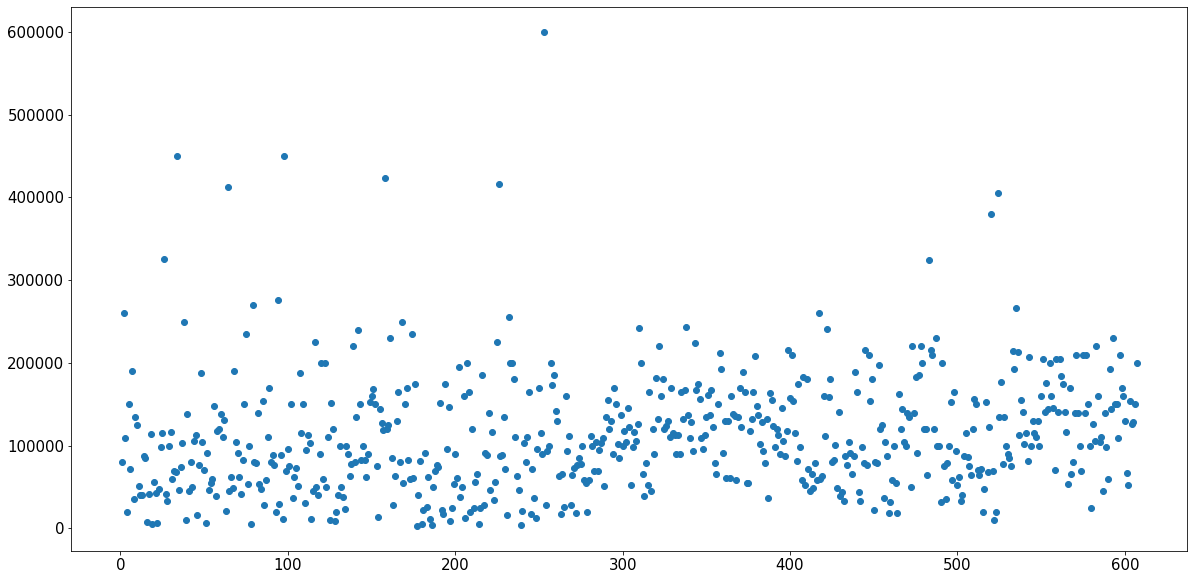

In [ ]:
x = data.job_title.index.values+1
y = data.salary_in_usd.values
plt.scatter(x, y)
plt.show()
#aqui estamos mostrando en un scatter plot de todos nuestros datos, son todos los puestos relacionado con sus salarios en USD

In [ ]:
barx = np.mean(x) 
bary = np.mean(y) 
#definimos el promedio de eje x y y (proceso de la regresion lineal)

In [ ]:
varx = np.var(x, ddof=1) #varianza muestral
covxy= np.cov(x,y, ddof=1) #covarianza muestral

varx, covxy 

(30754.666666666668, array([[3.07546667e+04, 2.07841838e+06],
        [2.07841838e+06, 5.03493266e+09]]))

In [ ]:
beta1 = covxy/varx
beta0=bary-beta1*barx
#esto es beta 0 y beta 1 que son parte de la prediccion
print(beta0, beta1)

[[   111993.86985173     91753.3718988 ]
 [    91753.3718988  -49656394.0231575 ]] [[1.00000000e+00 6.75805854e+01]
 [6.75805854e+01 1.63712802e+05]]


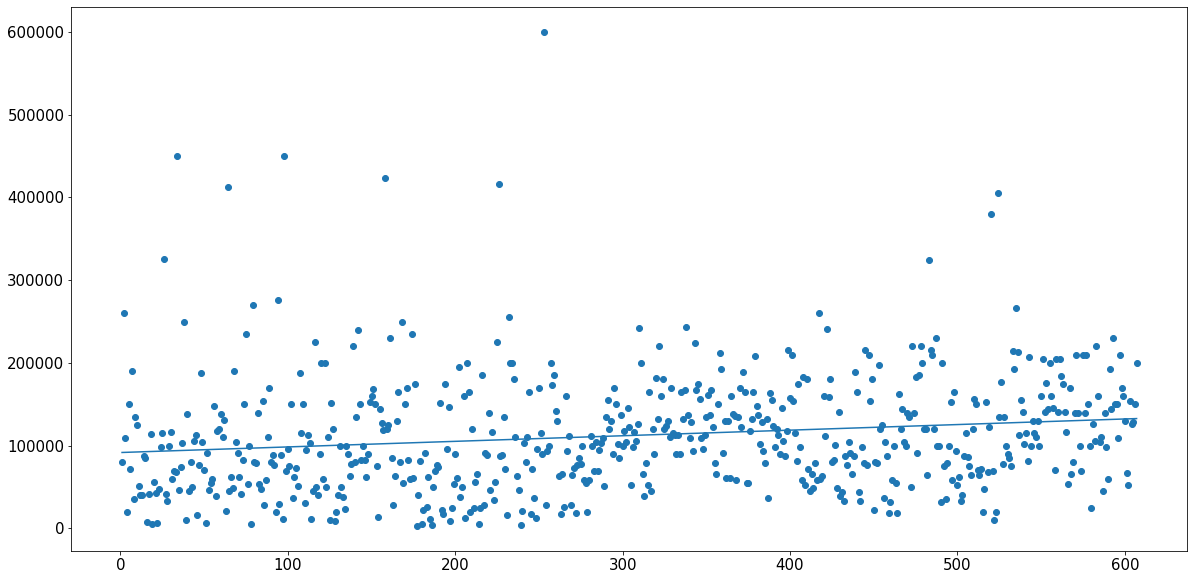

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats


slope, intercept, r, p, std_err= stats.linregress(x, y)
#creamos una funcion con la formula de la recta que regrese el valor predecido
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
#aqui ya tenemos la grafica de la recta generada estando en la mitad de los datos, lo cual nos predecirá datos que esten en esta recta.

In [ ]:
r #r es una medida (coeficiente de determinacion) que indica que tan buen modelo es el ajustado

0.1670246721807668

In [ ]:
data[data.job_title.index.values==200]
#aqui insertamos el numero que queramos predecir, por ejemplo el index 200, que es el puesto de un Data Scientist

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
200,200,2021,MI,FT,Data Scientist,52000,EUR,61467,DE,50,AT,M


In [ ]:
s = myfunc(200)
#llamamos la funcion e insertamos el valor que queramos predecir, en este caso, el puesto de Data Science.
print(s)

105269.48897309744


In [ ]:
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
dataframe = pd.DataFrame({'x':x, 'y':y})
print(dataframe)
#aqui creamos un data frame con las dos variables que es salarios en usd y puestos

       x       y
0      1   79833
1      2  260000
2      3  109024
3      4   20000
4      5  150000
..   ...     ...
602  603  154000
603  604  126000
604  605  129000
605  606  150000
606  607  200000

[607 rows x 2 columns]


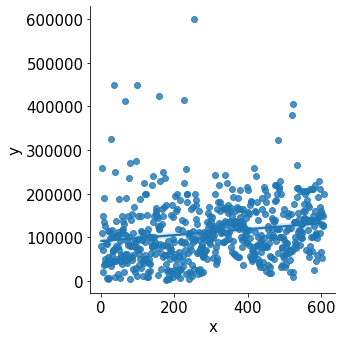

In [ ]:
sns.lmplot(x = 'x', y = 'y', data = dataframe)
#aqui graficamos esta data frame

In [ ]:
model = smf.ols('y ~ x', data = dataframe)
#creamos el modelo

In [ ]:
results = model.fit()
#creamos la variable results para guardar el resultado del modelo

In [ ]:
print(results.summary()) 
#creamos un resumen de los resultados y aqui podemos identificar el r-Squared

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     17.36
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           3.54e-05
Time:                        15:49:08   Log-Likelihood:                -7632.3
No. Observations:                 607   AIC:                         1.527e+04
Df Residuals:                     605   BIC:                         1.528e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.175e+04   5690.940     16.123      0.0

Podemos ver que el r squared es bastante bajo, lo cual el modelo no es tan preciso, lo cual nos sirve saberlo para entender y tenerlo en mente que tan confiable es el modelo, por temas que vemos los datos de esta base de datos no son tan preciso ya que están muy dispersos y no tienen un patron tal cual predictivo tan acertivo

Aqui podemos predecir que un Data scientist ganaria 105,269 dolares.

Con esto podemos concluir que la regresion lineal efectivamente sirve para predecir valores, teniendo variables responsivas y un set de datos que podemos relacionar, podemos predecir precios, salarios, temperaturas, etc. Como en este caso, predecimos el salario de un data scientist. Esto nos puede servir mucho en la vida para predecir tendencias, como por ejemplo la cantidad vendida de productos de AI, la tendencia de usuarios que compren en diferentes sitios web, etc.

